In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#load data 
df = pd.read_csv("train_loan.csv")

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.shape

(614, 13)

## Problem Statement: Predict whether eligible for loan
From problem statement, identify dependent and independent feature

Dependent feature : Loan status.
independent feature : all remaining

In [ ]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [ ]:
num = df.select_dtypes(exclude =object).columns

In [ ]:
df[num].head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0


In [ ]:
#Identify continuous and discrete columns
df[num].nunique()

ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
dtype: int64

From the data, out of 614 records, Loan amount term has just 10 distinct values and Credit history has 2 distinct values.So we consider Loan_Amount_Term and Credit_History as discrete values.Remaining numerical columns are continuous.

In [ ]:
num

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

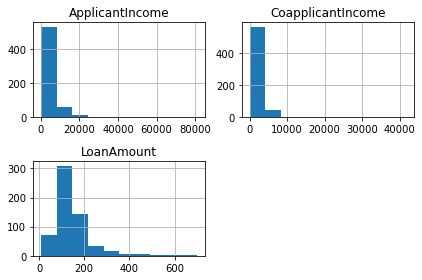

In [ ]:
df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']].hist()
plt.tight_layout()

In [ ]:
df.select_dtypes(include ='object').head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


In [ ]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [ ]:
df['Dependents'].replace('3+',3,inplace =True)

In [ ]:
df.select_dtypes(include ='object').head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


## Fill missing values

In [ ]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

For categorical columns, we will use mode to fill null values.For continuous we will use median, since all 3 are skewed data.

In [ ]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace =True)

In [ ]:
df['Married'].fillna(df['Married'].mode()[0],inplace =True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace =True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace =True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace =True)

In [ ]:
df['LoanAmount'].fillna(df['LoanAmount'].median(),inplace =True)

In [ ]:
df.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
df['Loan_Amount_Term'].nunique()

10

In [ ]:
# This can be considered a discrete column
df['Loan_Amount_Term'].mode()

0    360.0
dtype: float64

In [ ]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace =True)

In [ ]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Feature scaling

In [ ]:
df.describe(include = object)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,614,614,614,614,614,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,502,401,360,480,532,233,422


In [ ]:
df.drop('Loan_ID',axis =1,inplace =True)

In [ ]:
data  = pd.get_dummies(df, drop_first= True)

In [ ]:
X = data.drop('Loan_Status_Y',axis =1)
y =data['Loan_Status_Y']

In [ ]:
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,1,0,1,0,0,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,1,1,0,1,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,1,0,0,0,1,0,1
3,2583,2358.0,120.0,360.0,1.0,1,1,1,0,0,1,0,0,1
4,6000,0.0,141.0,360.0,1.0,1,0,1,0,0,0,0,0,1


In [ ]:
X.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049,0.817590,0.653094,0.586319,0.166124,0.164495,0.218241,0.133550,0.379479,0.328990
std,6109.041673,2926.248369,84.107233,64.428629,0.352339,0.386497,0.476373,0.492894,0.372495,0.371027,0.413389,0.340446,0.485653,0.470229
min,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Loan_Amount_Term  -label encode
# convert to log and standard scale

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()        # create an instance of label encoder
X['Loan_Amount_Term'] = le.fit_transform(X['Loan_Amount_Term'])

In [ ]:
X['ApplicantIncome'] = np.log(X['ApplicantIncome'])
X['LoanAmount'] = np.log(X['LoanAmount'])
# not applying log to coapplicant as 0 present

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X['ApplicantIncome'] = sc.fit_transform(X[['ApplicantIncome']]) # give the columns as 2-D array to avoid errors
X['CoapplicantIncome'] = sc.fit_transform(X[['CoapplicantIncome']]) 
X['LoanAmount'] =sc.fit_transform(X[['LoanAmount']])

## Train test split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .2,random_state = 42)

## Model Selection and Apply

## Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg_model = logreg.fit(X_train, y_train)
y_pred = logreg_model.predict(X_test)

### Check performance

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score, recall_score,f1_score

In [ ]:
print('Confusion matirx is: \n', confusion_matrix(y_test, y_pred))
print('Accuracy is: ', accuracy_score(y_test, y_pred))
print('precision score is :', precision_score(y_test, y_pred))
print('Recall score is :', recall_score(y_test, y_pred))
print('f1_score is :', f1_score(y_test, y_pred))

Confusion matirx is: 
 [[18 25]
 [ 1 79]]
Accuracy is:  0.7886178861788617
precision score is : 0.7596153846153846
Recall score is : 0.9875
f1_score is : 0.8586956521739131


## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
acc_values = [] # to store accuracy values for different neighbors
neighbors = np.arange(3,15)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors = k, metric ='minkowski')
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    acc_values.append(acc)


Text(0, 0.5, 'accuracy')

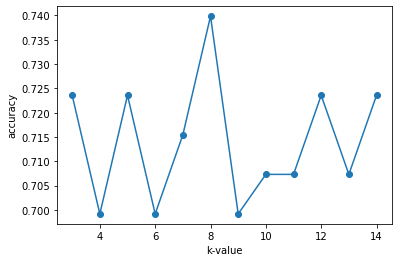

In [ ]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k-value')
plt.ylabel('accuracy')

In [ ]:
# accuracy max at k = 8.So set n_neighbors as 8

classifier = KNeighborsClassifier(n_neighbors = 8, metric ='minkowski')
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

### Check performance

In [ ]:
print('Confusion matirx is: \n', confusion_matrix(y_test, y_pred))
print('Accuracy is: ', accuracy_score(y_test, y_pred))
print('precision score is :', precision_score(y_test, y_pred))
print('Recall score is :', recall_score(y_test, y_pred))
print('f1_score is :', f1_score(y_test, y_pred))

Confusion matirx is: 
 [[15 28]
 [ 4 76]]
Accuracy is:  0.7398373983739838
precision score is : 0.7307692307692307
Recall score is : 0.95
f1_score is : 0.8260869565217392


KNN didnt improve the accuracy much compared to logistic regression.

## SVM

In [ ]:
from sklearn.svm import SVC

### Linear Kernel

In [ ]:
svm_clf = SVC(kernel='linear')
svm_model = svm_clf.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

In [ ]:
print('Confusion matirx is: \n', confusion_matrix(y_test, y_pred))
print('Accuracy is: ', accuracy_score(y_test, y_pred))
print('precision score is :', precision_score(y_test, y_pred))
print('Recall score is :', recall_score(y_test, y_pred))
print('f1_score is :', f1_score(y_test, y_pred))

Confusion matirx is: 
 [[18 25]
 [ 1 79]]
Accuracy is:  0.7886178861788617
precision score is : 0.7596153846153846
Recall score is : 0.9875
f1_score is : 0.8586956521739131


### Poly Kernel

In [ ]:
svm_clf = SVC(kernel='poly')
svm_model = svm_clf.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

In [ ]:
print('Confusion matirx is: \n', confusion_matrix(y_test, y_pred))
print('Accuracy is: ', accuracy_score(y_test, y_pred))
print('precision score is :', precision_score(y_test, y_pred))
print('Recall score is :', recall_score(y_test, y_pred))
print('f1_score is :', f1_score(y_test, y_pred))

Confusion matirx is: 
 [[17 26]
 [ 0 80]]
Accuracy is:  0.7886178861788617
precision score is : 0.7547169811320755
Recall score is : 1.0
f1_score is : 0.8602150537634409


### RBF kernel

In [ ]:
svm_clf = SVC(kernel='rbf')
svm_model = svm_clf.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

In [ ]:
print('Confusion matirx is: \n', confusion_matrix(y_test, y_pred))
print('Accuracy is: ', accuracy_score(y_test, y_pred))
print('precision score is :', precision_score(y_test, y_pred))
print('Recall score is :', recall_score(y_test, y_pred))
print('f1_score is :', f1_score(y_test, y_pred))

Confusion matirx is: 
 [[18 25]
 [ 1 79]]
Accuracy is:  0.7886178861788617
precision score is : 0.7596153846153846
Recall score is : 0.9875
f1_score is : 0.8586956521739131
